# Problem Description

Our purpouse is the weather time series prediction. Baseline taken from Skillbox webinar (tutor Anastasia Borneva, Sberbank).

Data taken from https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ) 
From 01/01/2016
to 21/10/2021

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel('weather.xls', skiprows=6)# No data in first 6 rows 
data['dates'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [3]:
data.shape

(16946, 30)

In [4]:
data = data[data['T'].notna()]
data.shape

(16945, 30)

In [5]:
data.head(7)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
0,19.10.2021 21:00,2.5,748.9,762.9,1.0,89.0,"Ветер, дующий с северо-запада",2,NaN,NaN,...,NaN,11.0,0.8,1,12.0,NaN,NaN,NaN,NaN,2021-10-19 21:00:00
1,19.10.2021 18:00,3.8,747.9,761.8,0.5,73.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,-0.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-19 18:00:00
2,19.10.2021 15:00,4.4,747.4,761.3,0.2,70.0,"Ветер, дующий с северо-запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-19 15:00:00
3,19.10.2021 12:00,3.0,747.2,761.2,0.7,81.0,"Ветер, дующий с северо-запада",2,NaN,NaN,...,NaN,18.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-19 12:00:00
4,19.10.2021 09:00,3.1,746.5,760.4,1.0,80.0,"Ветер, дующий с западо-северо-запада",2,NaN,NaN,...,NaN,20.0,-0.1,Осадков нет,12.0,Поверхность почвы сырая (вода застаивается на ...,1.0,NaN,NaN,2021-10-19 09:00:00
5,19.10.2021 06:00,3.3,745.5,759.4,0.8,81.0,"Ветер, дующий с северо-запада",2,NaN,NaN,...,NaN,20.0,0.3,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-19 06:00:00
6,19.10.2021 03:00,3.1,744.7,758.6,0.6,86.0,"Ветер, дующий с запада",1,NaN,NaN,...,NaN,20.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-19 03:00:00


In [6]:
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'dates'],
      dtype='object')

<AxesSubplot:>

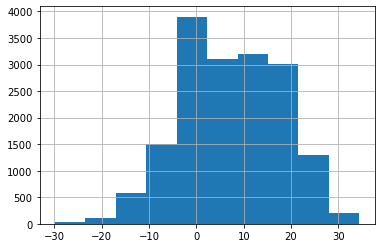

In [7]:
data['T'].hist()

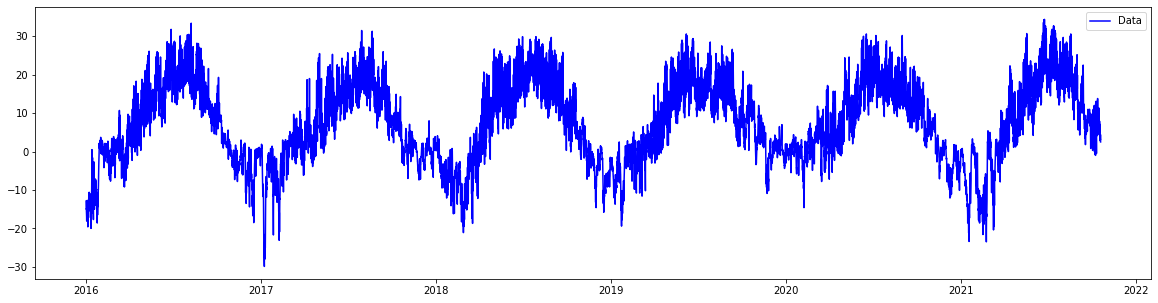

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(data['dates'], data['T'], color='blue', label='Data')
plt.legend()

# Train-Test split

In [9]:
data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

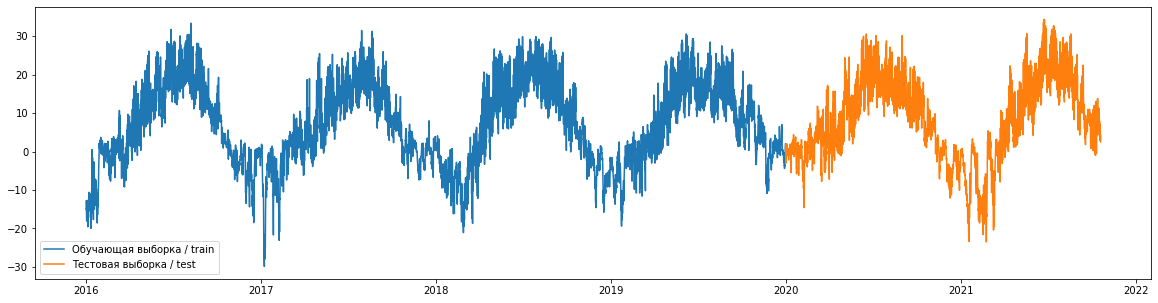

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(data_train['dates'], data_train['T'], label='Обучающая выборка / train')
plt.plot(data_test['dates'], data_test['T'], label='Тестовая выборка / test')
plt.legend()

# Feature Engeneering

In [11]:
data['dayofyear'] = data['dates'].dt.dayofyear

data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

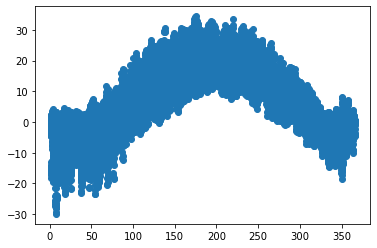

In [12]:
plt.scatter(data['dayofyear'], data['T'])

Since linear representation of variable is not effective, let's introduce trigonometric 

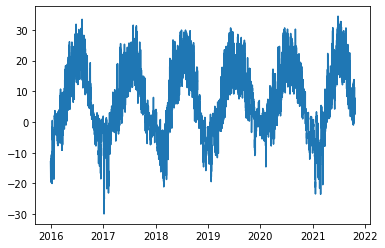

In [13]:
alpha = data['dayofyear']
radians = (alpha - 1) / 366 * 2 * np.pi

min(radians), max(radians), 2*np.pi

data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

plt.plot(data['dates'], data['T'])

# Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

## Simple linear regression

In [15]:
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

y_test = data_test['T']
y_train = data_train['T']

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

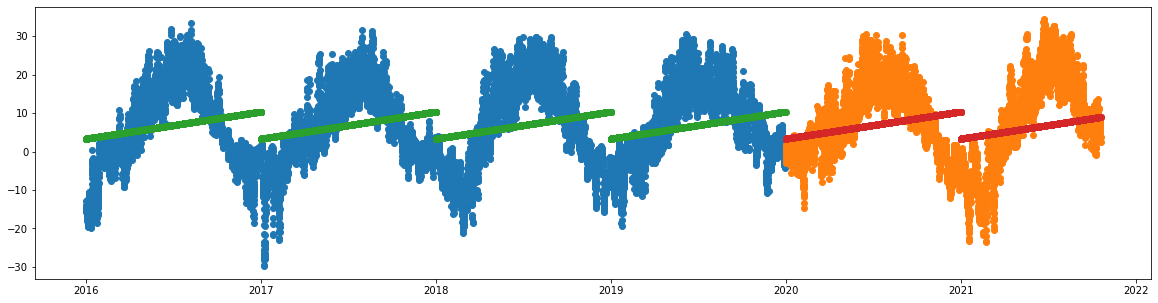

In [17]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dates'], y_train)
plt.scatter(data_test['dates'], y_test)
plt.scatter(data_train['dates'], pred_train)
plt.scatter(data_test['dates'], pred_test)

In [18]:
print('Train error:', mean_squared_error(y_train, pred_train))
print('Test error:', mean_squared_error(y_test, pred_test))

Train error: 105.66810600668144
Test error: 101.68686194592662


## Linear regression and trigonometric transformation

The nature of our data is periodic. We expect that using trigonometric functions will improve our quality,

### Cos(dates)

Train error: 29.40398343167642
Test error: 32.493753661673004


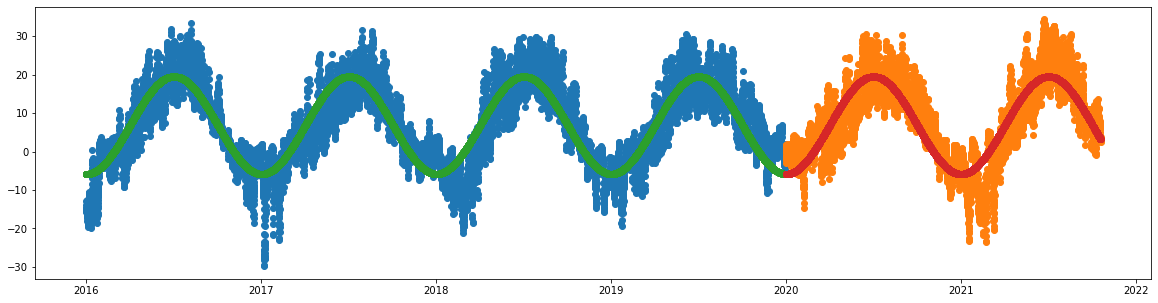

In [20]:
data['dayofyear'] = data['dates'].dt.dayofyear
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear'] 

X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear'] 

y_test = data_test['T']
y_train = data_train['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dates'], y_train)
plt.scatter(data_test['dates'], y_test)
plt.scatter(data_train['dates'], pred_train)
plt.scatter(data_test['dates'], pred_test)

print('Train error:', mean_squared_error(y_train, pred_train))
print('Test error:', mean_squared_error(y_test, pred_test))

### Cos(dates) and Sin(dates)

One can see that cos(t) is a term of Fourier series. We can add more terms of this series. The best result was obtained when cos and sin were taken. 

Train error: 25.293104204282933
Test error: 27.850628413497958


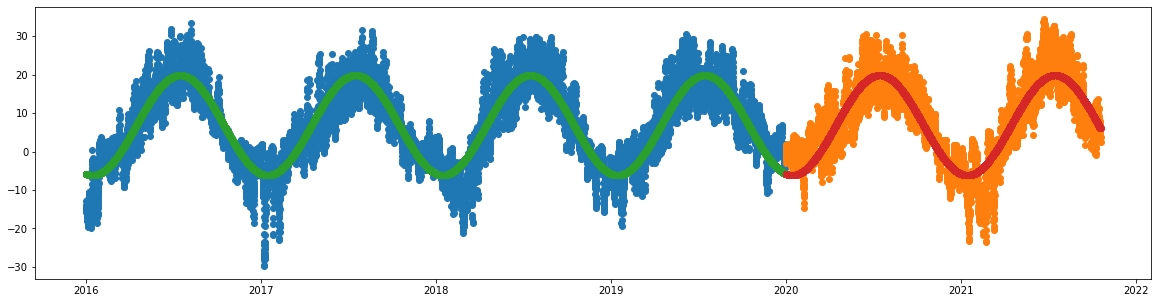

In [22]:
data['dayofyear'] = data['dates'].dt.dayofyear
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 * np.pi)

data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear'] 
X_train['sin_dayofyear'] = data_train['sin_dayofyear']

X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear'] 
X_test['sin_dayofyear'] = data_test['sin_dayofyear']

y_test = data_test['T']
y_train = data_train['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dates'], y_train)
plt.scatter(data_test['dates'], y_test)
plt.scatter(data_train['dates'], pred_train)
plt.scatter(data_test['dates'], pred_test)

print('Train error:', mean_squared_error(y_train, pred_train))
print('Test error:', mean_squared_error(y_test, pred_test))

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

Train error: 21.154194319706576
Test error: 33.52861185096216


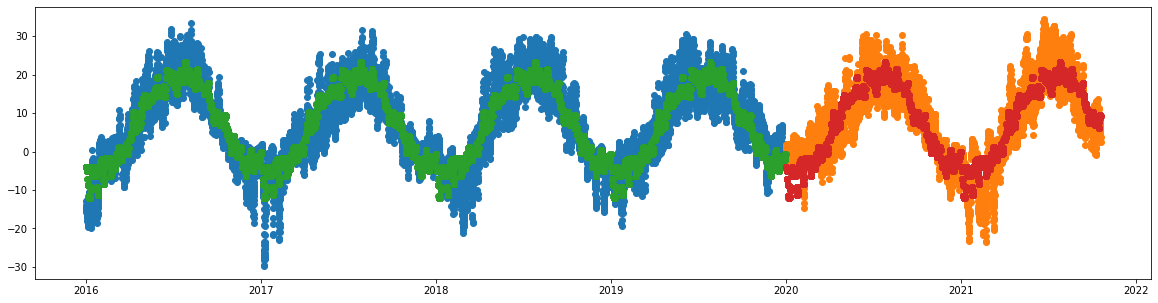

In [24]:
data['dayofyear'] = data['dates'].dt.dayofyear

data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear'] 

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear'] 

y_test = data_test['T']
y_train = data_train['T']

model = DecisionTreeRegressor() 
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dates'], y_train)
plt.scatter(data_test['dates'], y_test)
plt.scatter(data_train['dates'], pred_train)
plt.scatter(data_test['dates'], pred_test)

print('Train error:', mean_squared_error(y_train, pred_train))
print('Test error:', mean_squared_error(y_test, pred_test))

### Parameter optimization

Max depth = 1
Train error: 71.93422368384626
Test error: 69.02833100789961
Max depth = 2
Train error: 36.72633485819912
Test error: 45.48150110418926
Max depth = 3
Train error: 30.781142258723516
Test error: 39.33267991566355
Max depth = 4
Train error: 25.006190881051324
Test error: 34.22537757148175
Max depth = 5
Train error: 23.238699638200927
Test error: 32.65910092945177
Max depth = 6
Train error: 22.26928611959109
Test error: 32.124080304089574
Max depth = 7
Train error: 21.90616722850959
Test error: 32.967384798327586
Max depth = 8
Train error: 21.577326617065253
Test error: 33.15827981155343
Max depth = 9
Train error: 21.393087113898478
Test error: 33.262202851554534
Max depth = 10
Train error: 21.250052593447187
Test error: 33.47483943095173
Max depth = 11
Train error: 21.20643021699136
Test error: 33.46892238374047
Max depth = 12
Train error: 21.17619052680768
Test error: 33.47196032345961
Max depth = 13
Train error: 21.159758841634353
Test error: 33.540415326450166
Max depth 

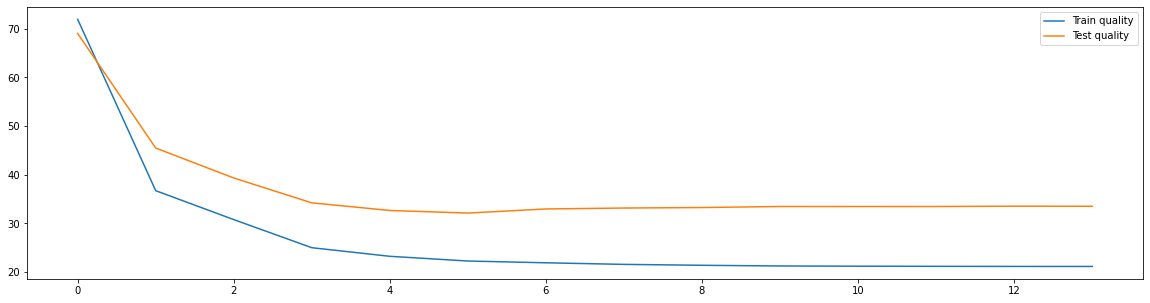

In [29]:
data['dayofyear'] = data['dates'].dt.dayofyear

data_train = data[data['dates'] < '2020-01-01']
data_test = data[data['dates'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear'] 

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear'] 

y_test = data_test['T']
y_train = data_train['T']

train_quality = []
test_quality = []


for _ in range(1, 15):
    model = DecisionTreeRegressor(max_depth = _) 
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    temp1 = mean_squared_error(y_train, pred_train)
    temp2 = mean_squared_error(y_test, pred_test)
    
    train_quality.append(temp1)
    test_quality.append(temp2)
    
    print("Max depth =", _)
    print('Train error:', temp1)
    print('Test error:', temp2)

plt.figure(figsize=(20, 5))
plt.plot(train_quality, label='Train quality')
plt.plot(test_quality, label='Test quality')
plt.legend()
plt.show()

## More models are coming soon